In [1]:
%matplotlib inline

import re
import pandas as pd
import os
import seaborn as sns

In [2]:
df = pd.read_csv('/home/jovyan/jt071-group23/jt071078/data/for_CNN_data(73081).csv')

In [3]:
df.shape

(73081, 5)

In [4]:
df.drop(df[pd.isnull(df['sentences_1000_str'])].index, inplace=True)
df.reset_index(drop=True,inplace=True)

In [5]:
df.tail(3)

,content,label,sentences,sentences_1000,sentences_1000_str
73062,TwitterandSquareCEOJackDorseyapparentlyhasbigv...,13,['TwitterandSquareCEOJackDorseyapparentlyhasbi...,['TwitterandSquareCEOJackDorseyapparentlyhasbi...,TwitterandSquareCEOJackDorseyapparentlyhasbigv...
73063,老大哥回來了嗎？從臉書審查到德國《網路執行法》文吳柏緯（記者）2018.3.22APPhot...,13,"['老大哥', '回來', '臉書', '審查', '德國', '網路', '執行', '法...","['老大哥', '回來', '臉書', '審查', '德國', '網路', '執行', '法...",老大哥 回來 臉書 審查 德國 網路 執行 法 文 吳柏緯 記者 MarcioJoseSan...
73064,設為首頁加入我的最愛開啟輔助訪問搜尋本站請登入後使用功能沒有帳號？立即註冊功能熱門首頁BBS...,13,"['設為', '首頁', '加入', '最愛', '開啟', '輔助', '訪問', '搜尋...","['設為', '首頁', '加入', '最愛', '開啟', '輔助', '訪問', '搜尋...",設為 首頁 加入 最愛 開啟 輔助 訪問 搜尋 本站 請登入 後 使用 功能 帳號 立即 註...


In [6]:
# 科技大擂台提供的語料
#a = pd.read_csv("./cna.cbow.512d.0.txt", header = None)
#a.head()

In [7]:
# 科技大擂台提供的語料，轉成word2vec需要的格式
# Terminal "cat cna.cbow.512d.0.txt | sed 's/\t/ /g' > file2.txt"
#c = pd.read_csv("/home/jovyan/final_project/group23/jt071073-copy/cna/cna.cbow.512d.0_spc.txt", header = None)
#c.head(20)

In [8]:
from gensim.models import word2vec
# 科技大擂台提供的語料庫 (https://fgc.stpi.narl.org.tw/activity/videoDetail/4b1141305ddf5522015de5479f4701b1)
# wv_model = word2vec.KeyedVectors.load_word2vec_format(
#     '/home/jovyan/final_project/group23/jt071073-copy/cna/word2vec_dataset/cna.cbow.512d.0_spc.txt', binary=False)
# 人民日報語料庫 sgns word (https://github.com/Embedding/Chinese-Word-Vectors)
# wv_model = word2vec.KeyedVectors.load_word2vec_format(
#     '/home/jovyan/final_project/group23/jt071073-copy/cna/word2vec_dataset/sgns.renmin.word.zh_tw', binary=False)
# 人民日報語料庫 sgns bigram
# wv_model = word2vec.KeyedVectors.load_word2vec_format(
#     '/home/jovyan/final_project/group23/jt071073-copy/cna/word2vec_dataset/sgns.renmin.bigram_zh_tw', binary=False)
# 中文維基百科 sgns word
# wv_model = word2vec.KeyedVectors.load_word2vec_format(
#     '/home/jovyan/final_project/group23/jt071073-copy/cna/word2vec_dataset/sgns.wiki.word_zh_tw', binary=False)
# 中文維基百科 sgns bigram
# wv_model = word2vec.KeyedVectors.load_word2vec_format(
#     '/home/jovyan/final_project/group23/jt071073-copy/cna/word2vec_dataset/sgns.wiki.bigram_zh_tw', binary=False)
#搜狗新聞 sgns word
# wv_model = word2vec.KeyedVectors.load_word2vec_format(
#      '/home/jovyan/final_project/group23/jt071073-copy/cna/word2vec_dataset/sgns.sogou.word_zh_tw', binary=False)
# 搜狗新聞 sgns bigram
# wv_model = word2vec.KeyedVectors.load_word2vec_format(
#     '/home/jovyan/final_project/group23/jt071073-copy/cna/word2vec_dataset/sgns.sogou.bigram_zh_tw', binary=False)
# 百度百科 ppmi word
# wv_model = word2vec.KeyedVectors.load_word2vec_format(
#     '/home/jovyan/final_project/group23/jt071073-copy/cna/word2vec_dataset/ppmi.baidubaike.word_zh_tw', binary=False)
# 百度百科 sgns word
wv_model = word2vec.KeyedVectors.load_word2vec_format(
    '/home/jovyan/final_project/group23/jt071073-copy/cna/word2vec_dataset/sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5_zh_tw', binary=False)

In [9]:
# from gensim import models
# wv_model = models.Word2Vec.load('./word2vec.model')

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['sentences_1000_str'])
sequences = tokenizer.texts_to_sequences(df['sentences_1000_str'])
word_index = tokenizer.word_index

In [12]:
#len(sequences)

In [13]:
#len(word_index)

In [14]:
embeddings_index = {}
word_vectors = wv_model.wv
MAX_NB_WORDS = 80000
for word, vocab_obj in wv_model.wv.vocab.items():
    if int(vocab_obj.index) < MAX_NB_WORDS:
        embeddings_index[word] = word_vectors[word]

In [15]:
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((len(word_index), EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [16]:
MAX_SEQUENCE_LENGTH = 1000
from keras.layers import Embedding
embedding_layer = Embedding(len(word_index),
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [17]:
all_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(df['label']))
print('Shape of data tensor:', all_data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (73065, 1000)
Shape of label tensor: (73065, 14)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val,indices_train,indices_val = train_test_split(all_data,labels,df.index, 
                                                                         test_size=0.3
                                                                         ,stratify=labels
                                                                         , random_state=42)

In [19]:
#x_train.shape,x_val.shape,y_train.shape,y_val.shape,indices_train.shape,indices_val.shape

In [20]:
from keras import Model
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(embedded_sequences)
x = MaxPooling1D(pool_size=5)(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling1D(pool_size=5)(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = MaxPooling1D(pool_size=35)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(14, activation='softmax')(x)

model = Model(sequence_input, preds)
# 設定使用2張GPU
# model = multi_gpu_model(model,2)
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['acc'])


In [21]:
#model.summary()

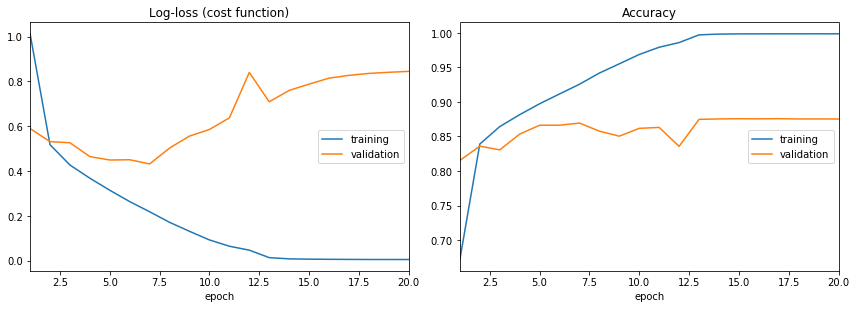

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from livelossplot import PlotLossesKeras

earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=10, 
                              verbose=1, 
                              mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=5, 
                              verbose=1, 
                              mode='auto',  
                              cooldown=0, 
                              min_lr=0)
csv_logger = CSVLogger('./log/27.log')

# 科技大擂台提供的語料 
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=128
          ,callbacks=[reduce_lr,PlotLossesKeras(),csv_logger],verbose=1)

# Data Analysis

In [23]:
y_pred = model.predict(np.array(x_val))

In [24]:
# classified class by model 
y_val_pred_class = []
for i in range(0, x_val.shape[0]):
    y_val_pred_class.append(y_pred[i].argmax())

In [25]:
# original class label in validation
y_val_class = []
for i in range(0, y_val.shape[0]):
    y_val_class.append(y_val[i].argmax())

In [26]:
# compare the label of all data
col_names =  ['Ind','label','classify']
output  = pd.DataFrame(columns = col_names)
output['Ind']=pd.Series(indices_val)
output['label']=pd.Series(y_val_class)
output['classify']=pd.Series(y_val_pred_class)
output

,Ind,label,classify
0,45608,7,7
1,4240,4,4
2,69288,12,12
3,59790,9,3
4,43484,7,7
5,24830,2,2
6,51202,8,8
7,34559,4,4
8,40130,5,5
9,18864,2,2


In [27]:
# get different label with classifying
wrong_list = output[output['label'] != output['classify']]
len(wrong_list.Ind)
wrong_list

,Ind,label,classify
3,59790,9,3
14,42221,6,0
21,29946,3,0
32,55832,8,0
39,64977,10,2
43,41737,6,0
48,43931,7,4
58,35197,4,3
73,30784,3,4
81,53262,8,3


In [28]:
# get index of different label with classifying
i = wrong_list['Ind'].values.tolist()

In [29]:
# label mapping
label_mapping = {'蘋果專區':0,
 'AI與大數據':1,
 '汽車':2,
 '財經':3,
 '旅遊':4,
 '美妝保養':5,
 '3C產品':6,
 '醫療健康':7,
 '職涯':8,
 '美食':9,
 '理財':10,
 '無人駕駛':11,
 '房地產':12,
 '區塊鏈技術':13}
label_mapping = dict((v, k) for k, v in label_mapping.items())

In [37]:
# get the orignal data of different label with classifying
wrong_label = df.iloc[i]
wrong_label['Ind'] = wrong_label.index
wrong = pd.merge(wrong_list, wrong_label, on="Ind") 
wrong['labelnm'] = wrong['label_x'].map(label_mapping)
wrong['classifynm'] = wrong['classify'].map(label_mapping)
pd.set_option('display.max_colwidth',1000)
wrong_classify = wrong.drop(columns=['label_x','classify','label_y','sentences','sentences_1000'])
wrong_classify

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Ind,content,sentences_1000_str,word_counts,string_counts,labelnm,classifynm
0,59790,每次外帶咖啡，你是否都會閃過紙杯很不環保的念頭？心想應該自備杯子，下次卻還是忘了。儘管不少店家推出環保杯折扣，但是三、五塊錢的吸引力好像不夠強。或許，像塑膠袋一樣強制收費，效果會更好？《彭博》報導，就在這個月初，英國國會向政府提出課徵「拿鐵稅」的建議，每只免洗紙杯收取0.25英鎊，等於每杯咖啡要多付約台幣10元，稅收將用於推動資源回收。而且假使在2023年之前不能達到回收所有咖啡杯的目標，就應該全面禁用一次性紙杯。這麼說，難道現在紙杯都沒有回收？《衛報》報導，根據英國國會環境審查委員會(TheEnvironmentalAuditCommittee)研究，英國人每年用掉25億個一次性紙杯，足以繞地球五圈半，但是回收率卻連0.25%都不到。原來，這些紙杯內都有一層塑膠膜，需要特殊設備才能使其分離，所以一般造紙廠都無法回收使用，最後只能掩埋或焚毀，可能造成土壤與空氣污染。目前，英國只有三家紙廠能夠處理一次性紙杯，其中包含知名紙廠JamesCropper，然而目前僅有五家咖啡店與其配合，每年只能回收1千萬個紙杯。成效之所以有限，紙廠認為癥結點在於將紙杯送到回收廠的運輸費用，若拿鐵稅能用於相關配套，就有可能增加回收數量。英國國會提出課稅訴求後，星巴克率先響應，將從二月起於倫敦共約20間門市試行3個月，每只一次性咖啡杯收取0.25英鎊費用，所得將全數捐給專門推動回收的慈善機構。自從英國於2015年10月開始收取每只塑膠袋0.05英鎊（約台幣2元）的費用後，每年已減少83%的塑膠袋用量，顯示強制收費的做法確實有效。然而，目前也有聲音認為不應該全由消費者承擔，企業也該擔負責任。如同《紐約時報》提到，目前已有幾間企業正在研發更便於回收的一次性紙杯。例如英國企業家MartinMyerscough發明的可回收紙杯「Frugalpac」，內層塑膠薄膜能夠輕鬆撕除，讓回收再製的過程更為簡易。面對一次性餐具對地球造成的傷害，人人都有責任。課稅的真正用意，其實在於鼓勵消費者自帶環保杯，不過同時若能督促業者確實回收，並鼓勵企業生產可回收紙杯，多管齊下才是解決之道。參考資料：BritishPoliticiansWanttoTaxCoffeeCupstoCutWasteMPscallfor25pchargeontakeawaycoffeecupsaheadofpossiblebanBritai...,每次 外帶 咖啡 是否 閃過 紙杯 環保 念頭 心想 應該 自備 杯子 下次 卻 忘 店家 推出 環保 杯 折扣 五塊 錢 吸引力 好像 不夠 強 塑膠袋 強制 收費 效果 更好 彭博 報導 月初 英國 國會 政府 提出 課徵 「 拿鐵稅 建議 只 免洗 紙杯 收取 英鎊 等於 每杯 咖啡 多付 約 台幣 元 稅收 用於 推動 資源 回收 年 之前 達到 回收 所有 咖啡杯 目標 應該 全面 禁用 一次性 紙杯 說 現在 紙杯 回收 衛報 報導 英國 國會 環境 審查 委員會 TheEnvironmentalAuditCommittee 研究 英國人 每年 掉 億個 一次性 紙杯 足以 繞 地球 五圈 回收率 卻連 不到 原來 紙杯 一層 塑膠 膜 需要 特殊 設備 使 分離 造紙廠 無法 回收 使用 最後 只能 掩埋 焚毀 造成 土壤 空氣污染 目前 英國 三家 紙廠 能夠 處理 一次性 紙杯 包含 知名 紙廠 JamesCropper 目前 僅有 五家 咖啡店 配合 每年 只能 回收 千萬個 紙杯 成效 有限 紙廠 認為 癥結 點 在於 紙杯 送到 回收 廠 運輸 費用 鐵稅 用於 相關 配套 增加 回收 數量 英國 國會 提出 課稅 訴求 後 星巴克 率先 響應 將從 二月 倫敦 共約 間 門市 試行 月 只 一次性 咖啡杯 收取 英鎊 費用 所得 全數 捐給 專門 推動 回收 慈善機構 英國 年 月 收取 只 塑膠袋 英鎊 約 台幣 元 費用 後 每年 已 減少 塑膠袋 用量 顯示 強制 收費 做法 確實 有效 目前 聲音 認為 應該 全 消費者 承擔 企業 擔負 責任 如同 紐約時報 提到 目前 已有 幾間 企業 正在 研發 便於 回收 一次性 紙杯 英國 企業家 MartinMyerscough 發明 可回收 紙杯 「 Frugalpac 內層 塑膠 薄膜 能夠 輕鬆 撕除 回收 再 製 過程 簡易 面對 一次性 餐具 地球 造成 傷害 責任 課稅 真正 用意 在於 鼓勵 消費者 自帶 環保 杯 若能 督促 業者 確實 回收 鼓勵 企業 生產 可回收 紙杯 多管齊下 解決之道 參考資料 BritishPoliticiansWanttoTaxCoffeeCupstoCutWasteMPscallfor25pchargeontakeawaycoffe...,1142,300,美食,財經
1,42221,新9.7吋iPad現在可用ApplePencil像電腦，不像任何電腦。要是電腦現在才發明，它會是什麼樣子？它應該功能強大，足以處理任何工作；又靈活便利，能夠隨處攜帶。它還應該直覺易用，讓你以觸控、鍵盤，甚至用筆隨心發揮1。換句話說，它不會是大家所認知「電腦」的樣子。它應該就是，新iPad。即將登場能力強大，讓你完成日常事務，與未來想做的事。EnlightVideoleap智慧影片剪接工具。A10Fusion晶片，為強勁效能打造。64位元架構、四核心設計、超過33億個電晶體。也就是說，iPad的快速令人驚歎。當你需要剪輯4K影片、玩起繪圖處理需求量大的遊戲，或體驗最新的擴增實境(AR)app時，iPad能隨時派上用場。重播MicrosoftPowerPoint輕鬆製作、編輯並播放簡報。多工處理輕輕鬆鬆，讓你一心多用。iPad具備充沛效能，能同時執行多個app。你可以一邊撰寫業務計畫書，一邊在網路上查資料，還同時跟同事FaceTime通話。實際用起來，比聽起來更簡單。Froggipedia以擴增實境觀察青蛙的生理結構。以最引人入勝的方式，體驗擴增實境。擴增實境(AR)是一項全新技術，能讓虛擬的物體出現在現實世界。iPad從顯示器、處理效能、攝錄鏡頭到動作感測器，在各方面都精心設計，就為讓擴增實境app能發揮比以往更加神奇的效果。擴增實境app徹底改變你所能做的一切。你可以在教室內外學習新事物；解決日常疑難雜症；盡情投入娛樂與遊戲世界。有了iPad與擴增實境，可能性，可說是無窮無盡。進一步了解擴增實境多才多藝，能當筆記本、相機和你所需的一切。Notability輕鬆做筆記、寫註解。ApplePencil，隨心所想，隨筆記下。iPad一向是記錄想法的出色工具，現在，更提供你全新做法。無論是抄筆記、畫水彩，或是簽租約，搭配ApplePencil使用，就能以像素等級的精準度與靈敏度完成一切。它用起來自然寫意就像鉛筆，又能讓你做到更多鉛筆做不到的事。進一步了解ApplePencil出色雙攝錄鏡頭，在行的豈止是拍照。內建的前置與後置攝錄鏡頭，可用來拍攝精美的照片與電影般的影片、掃描文件、FaceTime通話，或甚至利用擴增實境來製作室內平面圖。連接各種藍牙鍵盤，輕鬆打字。想要坐下來，埋首於研究報告、寄電子郵件，或是撰寫你的下一部劇本大作？iPad擁有直覺好用的螢幕鍵盤，也相...,新 吋 iPad 現在 可用 ApplePencil 電腦 不像 電腦 電腦 現在 發明 它會 樣子 應該 功能強大 足以 處理 工作 靈活 便利 能夠 隨處 攜帶 它還 應該 直覺 易用 觸控 鍵盤 用筆 隨心 發揮 認知 「 電腦 樣子 應該 新 iPad 登場 能力 強大 完成 日常事務 未來 想 做 事 EnlightVideoleap 智慧 影片 剪接 工具 A10Fusion 晶片 強勁 效能 打造 位元 架構 核心 設計 超過 億個 電晶體 也就是說 iPad 快速 令人驚歎 當你 需要 剪輯 影片 玩起 繪圖 處理 需求量 遊戲 體驗 最新 擴增 實境 AR app 時 iPad 隨時 派上用場 重播 MicrosoftPowerPoint 輕鬆 製作 編輯 播放 簡報 多工 處理 輕輕鬆鬆 一心多用 iPad 具備 充沛 效能 執行 多個 app 一邊 撰寫 業務 計畫 書 一邊 網路上 查資料 同事 FaceTime 通話 實際 聽 簡單 Froggipedia 擴增 實境 觀察 青蛙 生理 結構 最 引人入勝 方式 體驗 擴增 實境 擴增 實境 AR 一項 全新 技術 虛擬 物體 出現 現實 世界 iPad 顯示器 處理 效能 攝錄 鏡頭 動作 感測器 方面 精心設計 擴增 實境 app 發揮 以往 神奇 效果 擴增 實境 app 徹底改變 做 教室 內外 學習 新 事物 解決 日常 疑難雜症 盡情 投入 娛樂 遊戲 世界 iPad 擴增 實境 可能性 可說是 無窮無盡 進一步 了解 擴增 實境 多才多藝 能當 筆記本 相機 需 Notability 輕鬆 做 筆記 寫 註解 ApplePencil 隨心 想 隨筆 記下 iPad 一向 記錄 想法 出色 工具 現在 提供 全新 做法 無論是 抄 筆記 畫 水彩 簽 租約 搭配 ApplePencil 使用 像素 等級 精準度 靈敏度 完成 它用 自然 寫意 鉛筆 做到 鉛筆 做 不到 事 進一步 了解 ApplePencil 出色 雙 攝錄 鏡頭 行 拍照 內建 前置 後置 攝錄 

In [31]:
dfc = df
dfc['word_counts'] = dfc['content'].str.len()

def string_c(x):
    return len(x.split( ))
dfc['string_counts'] = dfc['sentences_1000_str'].apply(string_c)

In [32]:
dfc.head()

,content,label,sentences,sentences_1000,sentences_1000_str,word_counts,string_counts
0,"""ETF關鍵報告""台北開課公告(2018七月15日課程)綠角將在2018七月15日在台北開立""ETF關鍵報告""課程。綠角全部開課時程，請見綠角開課計畫。之前參加過的朋友的評價，可參考:“ETF關鍵報告”2018一、二月台北班學員課後回饋“ETF關鍵報告”2017十月高雄與十二月台北班學員課後回饋“ETF關鍵報告”2017九月台北班學員課後回饋(圖中每一個名字，都是一家ETF發行業者。美國的資產管理公司已經發行超過一千八百支ETF，管理2.5兆美金的ETF資產。)當別人已經透過美國券商使用全球金融界的主力投資工具時，你卻還只能留在台灣，接受次等公民的待遇，買那些內扣費用貴到爆表一定會傷害績效的境外基金?你是否以為ETF只要單純在美國開市時下單買賣即可，卻從未注意過自己下單時ETF的買賣價差與折溢價?你是否認為ETF只要內扣費用愈低就愈好，內扣費用愈低就會愈貼近指數表現，卻不知道要如何衡量資產管理公司的指數追蹤能力?”ETF關鍵報告”可以大幅增進你對美國ETF的瞭解，讓ETF成為你更得心應手的投資工具。ETF課程相關資訊如下:課程特色:1.美國已有一千八百支以上的ETF。投資於全球各地市場，各種資產類別，使用多種策略。懂得美國ETF，可以大幅擴增自己的投資機會。2.ETF關鍵報告是針對美國ETF的專門課程，主題明確。從第一節課的基本概念，到最後一節課的交易需要注意事項，由淺到深，每個段落都有確切的學習重點。確認參加的朋友都能對美國ETF有確實的掌握。3.課程內容由台灣最早開始有系統的寫文章介紹美國ETF的綠角編寫與全程講解。課程中，投資朋友將可以看到綠角多年ETF的投資心得。還有Email討論的管道。4.提供裝訂講義。除了課程內容外，附錄中還有各主要資產類別最具代表性的優秀ETF列表，可供日後查詢。5.教室位於捷運站附近或交通便捷之處，容易到達。課程內容三節課，三主題1.認識美國ETF內容:什麼是ETF(ETF對你絕對不再是陌生的單字)ETF的雙重特性解釋(基金的分散性，股票的交易性質)(金融創新帶來像基金卻又可全天成交的投資工具)ETF的折溢價(折溢價?聽起來有點技術性。聽完課就會知道其實很好懂)ETF的實物套利機制(聽起來更技術性了?其實也不難，知道這點就會知道大幅折溢價是如何形成的。)美國前三大ETF發行公司與其產品特性介紹(馬上對業界狀況有一輪廓)ETF...",10,"['ETF', '關鍵', '報告', '台北', '開課', '公告', '七月', '日', '課程', '綠角將', '七月', '日', '台北', '開立', 'ETF', '關鍵', '報告', '課程', '綠角', '全部開', '課時', '程', '請見', '綠角', '開課', '計畫', '之前', '參加', '過的', '朋友', '評價', '參考', 'ETF', '關鍵', '報告', '二月', '台北', '班', '學員', '課後', '回饋', 'ETF', '關鍵', '報告', '十月', '高雄', '十二月', '台北', '班', '學員', '課後', '回饋', 'ETF', '關鍵', '報告', '九月', '台北', '班', '學員', '課後', '回饋', '圖中', '一個', '名字', '一家', 'ETF', '發行', '業者', '美國', '資產', '管理', '公司', '已經', '發行', '超過', '一千八百', '支', 'ETF', '管理', '兆', '美金', 'ETF', '資產', '已經', '透過', '美國', '券商', '使用', '全球', '金融界', '主力', '投資', '工具', '時', '卻還', '只能', '留在', '台灣', '接受', '次', '公民', '待遇', '買', '內扣', '費用', '貴到', '爆表', '一定', '傷害', '績效', '境外', '基金', '是否', '以為', 'ETF', '美國', '開市', '時下', '買賣', '即可', '卻', '注意', '下單', '時', 'ETF', '買賣', '價差', '折', '溢價', '否認', 'ETF', '內扣', '費用', '愈低', '愈好', '內扣', '費用', '愈低', '愈', '貼近', '指數', '表現', '卻', '知道', '衡量', '資產', '管理', '公司', '指數', '追蹤', '能力', 'ETF', '關鍵', '報告', '大幅', '增進', '美國', 'ETF', '瞭解', 'ETF', '成為', '得心應手', '投資', '工具', 'ETF'...","['ETF', '關鍵', '報告', '台北', '開課', '公告', '七月', '日', '課程', '綠角將', '七月', '日', '台北', '開立', 'ETF', '關鍵', '報告', '課程', '綠角', '全部開', '課時', '程', '請見', '綠角', '開課', '計畫', '之前', '參加', '過的', '朋友', '評價', '參考', 'ETF', '關鍵', '報告', '二月', '台北', '班', '學員', '課後', '回饋', 'ETF', '關鍵', '報告', '十月', '高雄', '十二月', '台北', '班', '學員', '課後', '回饋', 'ETF', '關鍵', '報告', '九月', '台北', '班', '學員', '課後', '回饋', '圖中', '一個', '名字', '一家', 'ETF', '發行', '業者', '美國', '資產', '管理', '公司', '已經', '發行', '超過', '一千八百', '支', 'ETF', '管理', '兆', '美金', 'ETF', '資產', '已經', '透過', '美國', '券商', '使用', '全球', '金融界', '主力', '投資', '工具', '時', '卻還', '只能', '留在', '台灣', '接受', '次', '公民', '待遇', '買', '內扣', '費用', '貴到', '爆表', '一定', '傷害', '績效', '境外', '基金', '是否', '以為', 'ETF', '美國', '開市', '時下', '買賣', '即可', '卻', '注意', '下單', '時', 'ETF', '買賣', '價差', '折', '溢價', '否認', 'ETF', '內扣', '費用', '愈低', '愈好', '內扣', '費用', '愈低', '愈', '貼近', '指數', '表現', '卻', '知道', '衡量', '資產', '管理', '公司', '指數', '追蹤', '能力', 'ETF', '關鍵', '報告', '大幅', '增進', '美國', 'ETF', '瞭解', 'ETF', '成為', '得心應手', '投資', '工具', 'ETF'...",ETF 關鍵 報告 台北 開課 公告 七月 日 課程 綠角將 七月 日 台北 開立 ETF 關鍵 報告 課程 綠角 全部開 課時 程 請見 綠角 開課 計畫 之前 參加 過的 朋友 評價 參考 ETF 關鍵 報告 二月 台北 班 學員 課後 回饋 ETF 關鍵 報告 十月 高雄 十二月 台北 班 學員 課後 回饋 ETF 關鍵 報告 九月 台北 班 學員 課後 回饋 圖中 一個 名字 一家 ETF 發行 業者 美國 資產 管理 公司 已經 發行 超過 一千八百 支 ETF 管理 兆 美金 ETF 資產 已經 透過 美國 券商 使用 全球 金融界 主力 投資 工具 時 卻還 只能 留在 台灣 接受 次 公民 待遇 買 內扣 費用 貴到 爆表 一定 傷害 績效 境外 基金 是否 以為 ETF 美國 開市 時下 買賣 即可 卻 注意 下單 時 ETF 買賣 價差 折 溢價 否認 ETF 內扣 費用 愈低 愈好 內扣 費用 愈低 愈 貼近 指數 表現 卻 知道 衡量 資產 管理 公司 指數 追蹤 能力 ETF 關鍵 報告 大幅 增進 美國 ETF 瞭解 ETF 成為 得心應手 投資 工具 ETF 課程 相關 資訊 課程 特色 美國 已有 一千八百 支 以上 ETF 投資 全球 各地 市場 資產 類別 使用 多種 策略 懂得 美國 ETF 大幅 擴增 投資 機會 ETF 關鍵 報告 針對 美國 ETF 專門 課程 主題 明確 第一節 課 基本概念 最後 一節課 交易 需要 注意事項 淺 深 每個 段落 確切 學習 重點 確認 參加 朋友 美國 ETF 確實 掌握 課程內容 台灣 最早 系統 寫文章 介紹 美國 ETF 綠角 編寫 全程 講解 課程 中 投資 朋友 看到 綠角 多年 ETF 投資 心得 Email 討論 管道 提供 裝訂 講義 課程內容 外 附錄 中 主要 資產 類別 最具 代表性 優秀 ETF 列表 供 日後 查詢 教室 位於 捷運 站 附近 交通 便捷 處 容易 到達 課程內容 三節課 主題 認識 美國 ETF 內容 ETF ETF 陌生 單字 ETF 雙重 特

In [33]:
sn = 500 #字詞數量 
print('總筆數：'+ str(len(dfc['string_counts'])))
print('字詞數量小於'+str(sn)+'的筆數：'+str(len(dfc[dfc['string_counts'] <= sn])))
print('字詞數量小於'+str(sn)+'的比例：'+str(len(dfc[dfc['string_counts'] <= sn])/len(dfc[dfc['string_counts'] <= 1000])))

總筆數：73065
字詞數量小於500的筆數：50453
字詞數量小於500的比例：0.6905221378224868


In [34]:
df[pd.Series(df['content']).str.contains('人的一生約三分之一時間在睡覺')]

,content,label,sentences,sentences_1000,sentences_1000_str,word_counts,string_counts
32953,人的一生約三分之一時間在睡覺，但現代人的失眠已成為普遍問題。研究顯示，當睡眠被完全剝奪，會出現躁動不安、注意力下降、短期記憶變差，少數人甚至出現錯覺、幻覺、妄想與視覺錯亂等症狀。台灣人每年服下超過3億粒安眠藥台灣睡眠醫學學會委託研究顯示，全台慢性失眠盛行率高達11.3％。長期失眠不僅對專注力、記憶力、決策力、生活與工作能力造成影響，也可能增加日後罹患情緒障礙症（如憂鬱症）、心肺系統疾病、疼痛相關之骨骼肌肉系統疾病及免疫功能異常的風險。高雄醫學大學附設中和紀念醫院精神醫學部主治醫師蘇振翔表示，根據衛福部食藥署的資料，台灣人每年約服用下3億2700萬粒安眠藥，也就是平均一人一天要吞掉14粒。很多人不知道除了吃藥外的治療方法，藥物治療對於緩解失眠的療效較快，只是停藥後易復發。藥物雖能治療失眠，但不該是唯一的方法。非藥物治療失眠的方法中，經科學認證具療效且無副作用的是「認知行為治療」。針對睡眠障礙症 認知行為治療4方法蘇振翔醫師利用認知行為治療概念，設計出針對睡眠障礙症的非藥物治療協助方案，內容分成4部分：(1)睡眠衛生契約：條列重要的睡眠衛生事項，並與個案約定遵守(2)學習放鬆技巧：安排生理回饋治療，並提供放鬆光碟回家持續練習(3)睡眠日記：紀錄就寢、起床的時間及大致的入睡時間(4)睡眠調整：利用刺激控制法與睡眠濃縮法修正睡眠習慣及時間。8名長期使用2種以上高劑量安眠藥的個案，接受一個月的上述方案治療後，不僅自覺睡眠狀況改善，睡眠自我評量表的分數亦呈現進步，其中更有3名個案安眠藥使用劑量下降，另2名表示願意嘗試減低安眠藥劑量。失眠治療不僅是吃藥，若能合併上述等非藥物治療，能更早擺脫失眠之苦。,3,"['人', '一生', '約', '三分之一', '時間', '睡覺', '現代人', '失眠', '已成', '普遍', '問題', '研究', '顯示', '睡眠', '完全', '剝奪', '出現', '躁動不安', '注意力', '下降', '短期', '記憶', '變差', '少數', '人', '出現', '錯覺', '幻覺', '妄想', '視覺', '錯亂', '症狀', '台灣', '人', '每年', '服下', '超過', '億粒', '安眠藥', '台灣', '睡眠', '醫學', '學會', '委託', '研究', '顯示', '全', '台', '慢性', '失眠', '盛行', '率', '高達', '長期', '失眠', '專注', '力', '記憶力', '決策', '力', '生活', '工作', '能力', '造成', '影響', '增加', '日後', '罹患', '情緒', '障礙', '症', '憂鬱症', '心肺', '系統疾病', '疼痛', '相關', '骨骼', '肌肉', '系統疾病', '免疫', '功能', '異常', '風險', '高雄醫學', '大學', '附設', '中', '紀念', '醫院', '精神', '醫學部', '主治醫師', '蘇振翔', '表示', '衛福部', '食藥署', '資料', '台灣', '人', '每年', '約', '服用', '下', '億', '萬粒', '安眠藥', '平均', '一人', '一天', '吞掉', '粒', '人', '知道', '吃藥', '外', '治療', '方法', '藥物', '治療', '緩解', '失眠', '療效', '停藥', '後', '易', '復發', '藥物', '雖能', '治療', '失眠', '不該', '唯一', '方法', '非', '藥物', '治療', '失眠', '方法', '中', '科學', '認證', '具', '療效', '無副作用', '「', '認知', '行為', '治療', '針對', '睡眠', '障礙', '症', '認知', '行為', '治療', '方法', '蘇振翔', '醫師', '利用', '認知', '行為', '治療', '概念', '設計', '針對', '睡眠',...","['人', '一生', '約', '三分之一', '時間', '睡覺', '現代人', '失眠', '已成', '普遍', '問題', '研究', '顯示', '睡眠', '完全', '剝奪', '出現', '躁動不安', '注意力', '下降', '短期', '記憶', '變差', '少數', '人', '出現', '錯覺', '幻覺', '妄想', '視覺', '錯亂', '症狀', '台灣', '人', '每年', '服下', '超過', '億粒', '安眠藥', '台灣', '睡眠', '醫學', '學會', '委託', '研究', '顯示', '全', '台', '慢性', '失眠', '盛行', '率', '高達', '長期', '失眠', '專注', '力', '記憶力', '決策', '力', '生活', '工作', '能力', '造成', '影響', '增加', '日後', '罹患', '情緒', '障礙', '症', '憂鬱症', '心肺', '系統疾病', '疼痛', '相關', '骨骼', '肌肉', '系統疾病', '免疫', '功能', '異常', '風險', '高雄醫學', '大學', '附設', '中', '紀念', '醫院', '精神', '醫學部', '主治醫師', '蘇振翔', '表示', '衛福部', '食藥署', '資料', '台灣', '人', '每年', '約', '服用', '下', '億', '萬粒', '安眠藥', '平均', '一人', '一天', '吞掉', '粒', '人', '知道', '吃藥', '外', '治療', '方法', '藥物', '治療', '緩解', '失眠', '療效', '停藥', '後', '易', '復發', '藥物', '雖能', '治療', '失眠', '不該', '唯一', '方法', '非', '藥物', '治療', '失眠', '方法', '中', '科學', '認證', '具', '療效', '無副作用', '「', '認知', '行為', '治療', '針對', '睡眠', '障礙', '症', '認知', '行為', '治療', '方法', '蘇振翔', '醫師', '利用', '認知', '行為', '治療', '概念', '設計', '針對', '睡眠',...",人 一生 約 三分之一 時間 睡覺 現代人 失眠 已成 普遍 問題 研究 顯示 睡眠 完全 剝奪 出現 躁動不安 注意力 下降 短期 記憶 變差 少數 人 出現 錯覺 幻覺 妄想 視覺 錯亂 症狀 台灣 人 每年 服下 超過 億粒 安眠藥 台灣 睡眠 醫學 學會 委託 研究 顯示 全 台 慢性 失眠 盛行 率 高達 長期 失眠 專注 力 記憶力 決策 力 生活 工作 能力 造成 影響 增加 日後 罹患 情緒 障礙 症 憂鬱症 心肺 系統疾病 疼痛 相關 骨骼 肌肉 系統疾病 免疫 功能 異常 風險 高雄醫學 大學 附設 中 紀念 醫院 精神 醫學部 主治醫師 蘇振翔 表示 衛福部 食藥署 資料 台灣 人 每年 約 服用 下 億 萬粒 安眠藥 平均 一人 一天 吞掉 粒 人 知道 吃藥 外 治療 方法 藥物 治療 緩解 失眠 療效 停藥 後 易 復發 藥物 雖能 治療 失眠 不該 唯一 方法 非 藥物 治療 失眠 方法 中 科學 認證 具 療效 無副作用 「 認知 行為 治療 針對 睡眠 障礙 症 認知 行為 治療 方法 蘇振翔 醫師 利用 認知 行為 治療 概念 設計 針對 睡眠 障礙 症 非 藥物 治療 協助 方案 內容 分成 部分 睡眠 衛生 契約 條列 重要 睡眠 衛生 事項 並與 個案 約定 遵守 學習 放鬆 技巧 安排 生理 回饋 治療 提供 放鬆 光碟 回家 持續 練習 睡眠 日記 紀錄 就寢 起床 時間 入睡 時間 睡眠 調整 利用 刺激 控制法 睡眠 濃縮 法 修正 睡眠 習慣 時間 名 長期 使用 種 以上 高 劑量 安眠藥 個案 接受 一個月 上述 方案 治療 後 自覺 睡眠 狀況 改善 睡眠 自我 評量 表 分數 亦 呈現 進步 名 個案 安眠藥 使用 劑量 下降 名 表示 願意 嘗試 減低 安眠藥 劑量 失眠 治療 吃藥 若能 合併 上述 非 藥物 治療 早 擺脫 失眠 之苦,704,274
